In [ ]:
acct = [116,147, 144, 132, 133, 141, 160, 109, 124]


In [1]:
# double or triple exponential smoothing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#%matplotlib inline

In [53]:
# prepare data
acct_data = [4.08, 4.13, 4.04, 4.01, 3.94, 3.94, 3.86, 3.84, 3.94, 3.84]
actu_data = [3.96, 3.83, 3.94, 3.81, 3.81, 3.91, 3.73, 3.81, 3.79, 3.75]
fina_data = [4.18, 4.04, 3.98, 4.01, 4.01, 3.93, 3.87, 3.82, 3.85, 3.77]
info_data = [4.53, 5.34, 3.90, 3.93, 3.97, 3.89, 5.25, 3.78, 4.00, 3.88]
inte_data = [4.42, 4.29, 4.37, 4.39, 4.04, 4.04, 3.88, 3.80, 4.13, 3.84]
mgmt_data = [4.11, 4.09, 3.93, 4.00, 3.88, 3.93, 3.90, 3.84, 3.83, 3.75]
mrkt_data = [3.97, 3.96, 3.88, 3.98, 3.90, 3.85, 3.96, 3.83, 3.82, 3.78]
oper_data = [3.93, 3.92, 3.94, 3.99, 4.02, 3.95, 4.04, 3.94, 3.86, 3.64]
real_data = [4.14, 4.09, 4.05, 4.23, 4.13, 3.97, 3.91, 3.87, 3.97, 3.83]
risk_data = [4.01, 4.02, 3.95, 3.88, 3.87, 3.89, 3.71, 3.74, 3.83, 3.65]

In [54]:
acct_index= pd.date_range(start='2009', end='2019', freq='A')
acct_data_ser = pd.Series(acct_data, acct_index)
acct_figure = pd.Series(acct_data, acct_index)

In [55]:
actu_index= pd.date_range(start='2009', end='2019', freq='A')
actu_data_ser = pd.Series(actu_data, actu_index)
actu_figure = pd.Series(actu_data, actu_index)

In [56]:
fina_index= pd.date_range(start='2009', end='2019', freq='A')
fina_data_ser = pd.Series(fina_data, fina_index)
fina_figure = pd.Series(fina_data, fina_index)

In [57]:
info_index= pd.date_range(start='2009', end='2019', freq='A')
info_data_ser = pd.Series(info_data, info_index)
info_figure = pd.Series(info_data, info_index)

In [58]:
inte_index= pd.date_range(start='2009', end='2019', freq='A')
inte_data_ser = pd.Series(inte_data, inte_index)
inte_figure = pd.Series(inte_data, inte_index)

In [59]:
mgmt_index= pd.date_range(start='2009', end='2019', freq='A')
mgmt_data_ser = pd.Series(mgmt_data, mgmt_index)
mgmt_figure = pd.Series(mgmt_data, mgmt_index)

In [60]:
mrkt_index= pd.date_range(start='2009', end='2019', freq='A')
mrkt_data_ser = pd.Series(mrkt_data, mrkt_index)
fina_figure = pd.Series(mrkt_data, mrkt_index)

In [61]:
fina_index= pd.date_range(start='2009', end='2019', freq='A')
fina_data_ser = pd.Series(fina_data, fina_index)
fina_figure = pd.Series(fina_data, fina_index)

In [62]:
oper_index= pd.date_range(start='2009', end='2019', freq='A')
oper_data_ser = pd.Series(oper_data, oper_index)
oper_figure = pd.Series(oper_data, oper_index)

In [63]:
real_index= pd.date_range(start='2009', end='2019', freq='A')
real_data_ser = pd.Series(real_data, real_index)
real_figure = pd.Series(real_data, real_index)

In [64]:
risk_index= pd.date_range(start='2009', end='2019', freq='A')
risk_data_ser = pd.Series(risk_data, risk_index)
risk_figure = pd.Series(risk_data, risk_index)

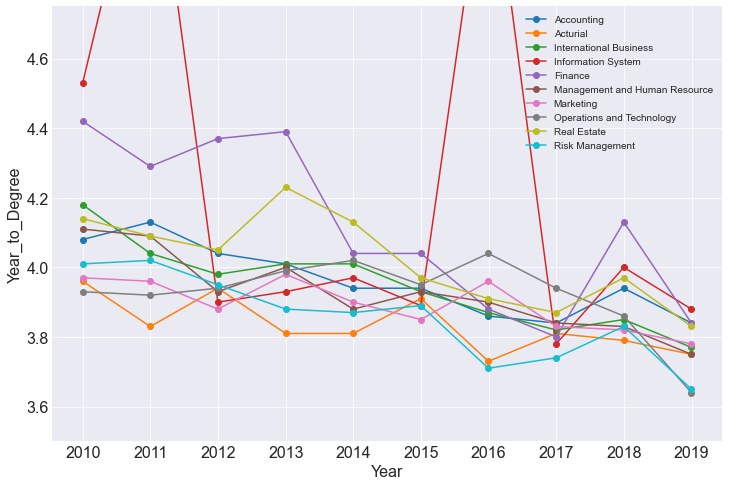

In [68]:
plt.figure(figsize=(12, 8))
plt.plot(acct_data_ser, marker='o')
plt.plot(actu_data_ser, marker='o')
plt.plot(fina_data_ser, marker='o')
plt.plot(info_data_ser, marker='o')
plt.plot(inte_data_ser, marker='o')
plt.plot(mgmt_data_ser, marker='o')
plt.plot(mrkt_data_ser, marker='o')
plt.plot(oper_data_ser, marker='o')
plt.plot(real_data_ser, marker='o')
plt.plot(risk_data_ser, marker='o')
plt.style.use('seaborn-darkgrid')
plt.xlabel("Year", fontsize = '16')
plt.ylabel("Year_to_Degree", fontsize = '16')
plt.ylim(3.5, 4.75)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Accounting','Acturial', 'International Business', 'Information System', 'Finance', 'Management and Human Resource', 'Marketing', 'Operations and Technology', 'Real Estate', 'Risk Management'],loc='upper right')
#plt.legend(['Accounting','Acturial', 'International Business', 'Finance', 'Management and Human Resource', 'Marketing', 'Operations and Technology', 'Real Estate', 'Risk Management'])
plt
plt.savefig('73.png', bbox_inches='tight')

In [23]:
fit1 = statsmodels.tsa.holtwinters.Holt(acct_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast1 = fit1.forecast(2).rename(r'$\alpha=0.2$')

In [24]:
fit2 = statsmodels.tsa.holtwinters.Holt(actu_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast2 = fit2.forecast(2).rename(r'$\alpha=0.2$')

In [25]:
fit3 = statsmodels.tsa.holtwinters.Holt(fina_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast3 = fit3.forecast(2).rename(r'$\alpha=0.2$')

In [26]:
fit4 = statsmodels.tsa.holtwinters.Holt(inte_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast4 = fit4.forecast(2).rename(r'$\alpha=0.2$')

In [27]:
fit5 = statsmodels.tsa.holtwinters.Holt(mgmt_data_ser, exponential=True, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast5 = fit5.forecast(2).rename(r'$\alpha=0.2$')

In [28]:
fit6 = statsmodels.tsa.holtwinters.Holt(mrkt_data_ser,exponential=True, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast6 = fit6.forecast(2).rename(r'$\alpha=0.2$')

In [29]:
fit7 = statsmodels.tsa.holtwinters.Holt(oper_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast7 = fit7.forecast(2).rename(r'$\alpha=0.2$')

In [30]:
fit8 = statsmodels.tsa.holtwinters.Holt(real_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast8 = fit8.forecast(2).rename(r'$\alpha=0.2$')

In [31]:
fit9 = statsmodels.tsa.holtwinters.Holt(risk_data_ser, initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend = 0.2, optimized=False)
fcast9 = fit9.forecast(2).rename(r'$\alpha=0.2$')

In [32]:
fit10 = statsmodels.tsa.holtwinters.Holt(info_data_ser, initialization_method=None).fit(smoothing_level=0.15, smoothing_trend = 0.4, optimized=False)
fcast10 = fit10.forecast(2).rename(r'$\alpha=0.2$')

C:\Users\rangfu.hu\Python_Home\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


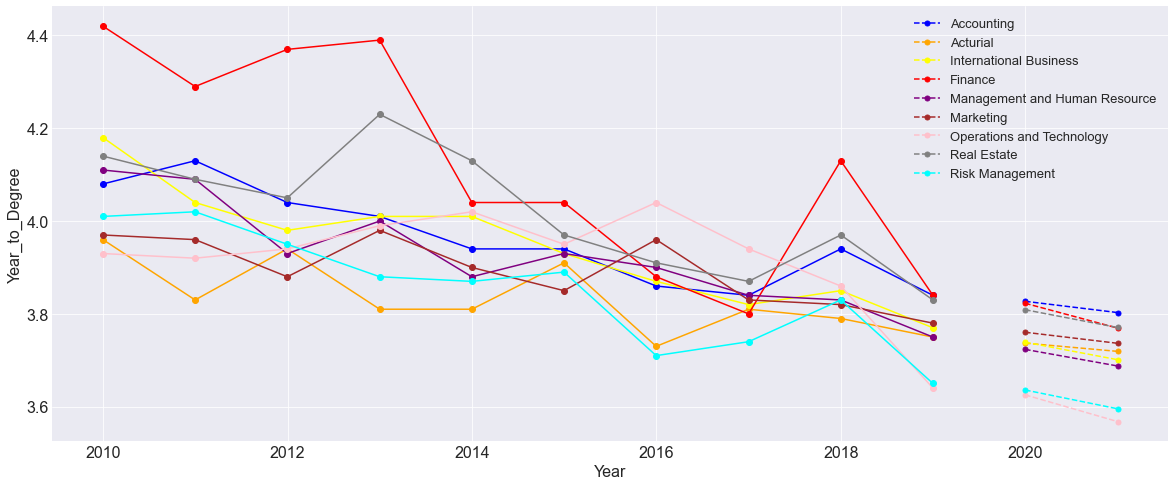

In [71]:
plt.figure(figsize=(20, 8))

plt.plot(acct_data_ser, marker='o', color = 'blue')
#plt.plot(fit1.fittedvalues, marker='o', color='red')
line1, = plt.plot(fcast1, marker='o', color = 'blue', linestyle='dashed', markersize=5)

plt.plot(actu_data_ser, marker='o', color = 'orange')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', linestyle='dashed', color = 'orange', markersize=5)

plt.plot(fina_data_ser, marker='o', color='yellow')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line3, = plt.plot(fcast3, marker='o', linestyle='dashed', color='yellow', markersize=5)

#plt.plot(info_data_ser, marker='o', color='magenta')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
#line10, = plt.plot(fcast10, marker='o', linestyle='dashed', color='magenta', markersize=5)

plt.plot(inte_data_ser, marker='o', color='red')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line4, = plt.plot(fcast4, marker='o', linestyle='dashed', color='red', markersize=5)

plt.plot(mgmt_data_ser, marker='o', color='purple')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line5, = plt.plot(fcast5, marker='o', linestyle='dashed',  color='purple', markersize=5)

plt.plot(mrkt_data_ser, marker='o', color='brown')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line6, = plt.plot(fcast6, marker='o', linestyle='dashed',  color='brown', markersize=5)

plt.plot(oper_data_ser, marker='o', color='pink')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line7, = plt.plot(fcast7, marker='o', linestyle='dashed',  color='pink', markersize=5)

plt.plot(real_data_ser, marker='o', color='gray')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line8, = plt.plot(fcast8, marker='o', linestyle='dashed',  color='gray', markersize=5)

plt.plot(risk_data_ser, marker='o', color='cyan')
#plt.plot(fit2.fittedvalues, marker='o', color='red')
line9, = plt.plot(fcast9, marker='o', linestyle='dashed',  color='cyan', markersize=5)

#plt.legend([line1, line2, line3, line10, line4, line5, line6, line7, line8, line9], ['Accounting','Acturial', 'International Business', 'Information System', 'Finance', 'Management and Human Resource', 'Marketing', 'Operations and Technology', 'Real Estate', 'Risk Management'], loc='upper right', fontsize = '13')
plt.legend([line1, line2, line3, line4, line5, line6, line7, line8, line9], ['Accounting','Acturial', 'International Business', 'Finance', 'Management and Human Resource', 'Marketing', 'Operations and Technology', 'Real Estate', 'Risk Management'], loc='upper right', fontsize = '13')
plt.style.use('seaborn-darkgrid')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Year", fontsize = '16')
plt.ylabel("Year_to_Degree", fontsize = '16')

plt
plt.savefig('80.png', bbox_inches='tight')

In [46]:
avg = [4.13, 4.17, 4.00, 4.02, 3.96, 3.93, 4.01, 3.83, 3.90, 3.77]

In [47]:
avg_index= pd.date_range(start='2009', end='2019', freq='A')
avg_data_ser = pd.Series(acct_data, acct_index)
avg_figure = pd.Series(acct_data, acct_index)

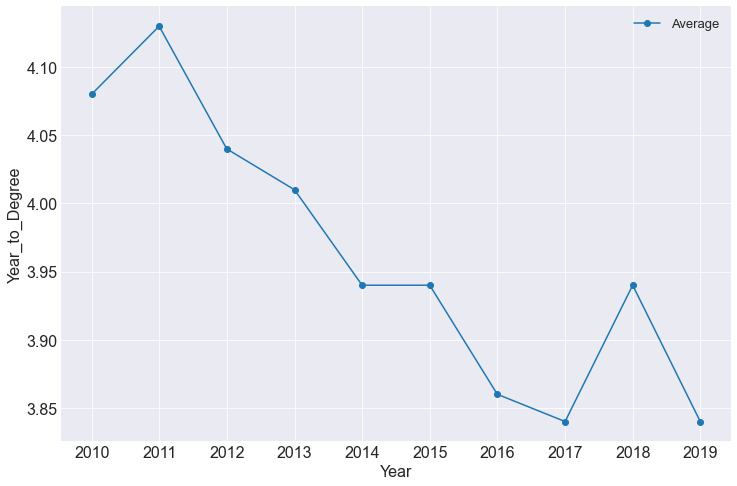

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(acct_data_ser, marker='o')
plt.style.use('seaborn-darkgrid')
plt.xlabel("Year", fontsize = '16')
plt.ylabel("Year_to_Degree", fontsize = '16')
#plt.ylim(3.5, 5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(['Accounting','Acturial', 'International Business', 'Information System', 'Finance', 'Management and Human Resource', 'Marketing', 'Operations and Technology', 'Real Estate', 'Risk Management'],loc='upper right')
#plt.legend(['Accounting','Acturial', 'International Business', 'Finance', 'Management and Human Resource', 'Marketing', 'Operations and Technology', 'Real Estate', 'Risk Management'])
plt.legend(['Average'], loc='upper right', fontsize = '13')
plt
plt.savefig('60.png', bbox_inches='tight')